<a href="https://colab.research.google.com/github/athkiee/Tugas-Python-11_Dataset-Daun/blob/main/Tugas11_python_dataset_daun_Atharizky_Ade_S_1101208339_TTX_44_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [3]:
ls

 3scene/                                  forest_1.jpg      shibuya_street.jpg
 best_weight_scene_mobileNet.h5           highway.jpg       Untitled0.ipynb
'Copy of Snippets: Importing libraries'   nnmodel_scene/    Untitled1.ipynb
 dataset_daun/                            nnmodel_scene2/


In [4]:
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset_daun")
data = []
labels = []

[INFO] loading images...


In [6]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
 
  # preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [7]:
print(labels)

['GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09', 'GMB_09',

In [8]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [10]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.35, shuffle=True)
print(trainX.shape)
print(testX.shape)

(386, 64, 64, 3)
(208, 64, 64, 3)


In [11]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D

model = Sequential()
model.add(Convolution2D(32, (5,5), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(2,2))
# fully connected layer
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10816)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1081700   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [12]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=75, batch_size=32)

[INFO] training network...
Epoch 1/75
13/13 [==============================] - 0s 26ms/step - loss: 1.6974 - accuracy: 0.2565 - val_loss: 1.5305 - val_accuracy: 0.3125
Epoch 2/75
13/13 [==============================] - 0s 9ms/step - loss: 1.3973 - accuracy: 0.4301 - val_loss: 1.4576 - val_accuracy: 0.3413
Epoch 3/75
13/13 [==============================] - 0s 9ms/step - loss: 1.2788 - accuracy: 0.4637 - val_loss: 1.2525 - val_accuracy: 0.4087
Epoch 4/75
13/13 [==============================] - 0s 9ms/step - loss: 1.1153 - accuracy: 0.5078 - val_loss: 1.1629 - val_accuracy: 0.4567
Epoch 5/75
13/13 [==============================] - 0s 9ms/step - loss: 0.9976 - accuracy: 0.6010 - val_loss: 1.1016 - val_accuracy: 0.5144
Epoch 6/75
13/13 [==============================] - 0s 8ms/step - loss: 1.0385 - accuracy: 0.5855 - val_loss: 0.8962 - val_accuracy: 0.6298
Epoch 7/75
13/13 [==============================] - 0s 8ms/step - loss: 0.8812 - accuracy: 0.6425 - val_loss: 0.8850 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


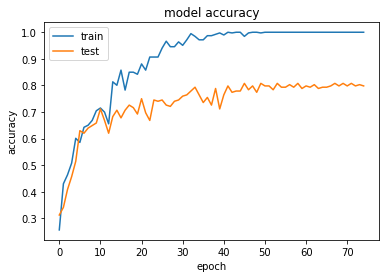

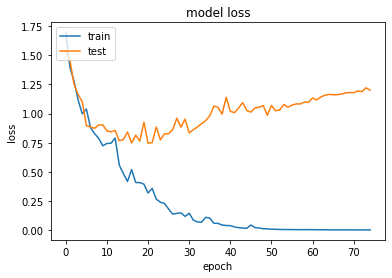

In [13]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.83      0.81      0.82        37
      GMB_02       0.71      0.71      0.71        38
      GMB_05       0.76      0.89      0.82        35
      GMB_09       0.96      0.88      0.92        50
      GMB_11       0.72      0.71      0.72        48

    accuracy                           0.80       208
   macro avg       0.80      0.80      0.80       208
weighted avg       0.80      0.80      0.80       208



In [15]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [23]:
import cv2
import matplotlib.pyplot as plt
image1='dataset_daun/GMB_09/IMG_20200814_125442_HDR.jpg'

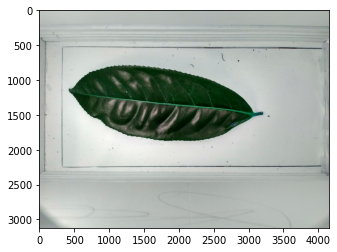

In [24]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [28]:
image_testing = Image.open('dataset_daun/GMB_09/IMG_20200814_125442_HDR.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [29]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [30]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[6.2469866e-07 2.0634260e-14 1.5784599e-11 9.9999809e-01 1.3146542e-06]]
['GMB_09']
